In [1]:
import pandas as pd
pd.set_option('display.float_format', '{:.2f}'.format)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import os
import plotly.express as px
import plotly.graph_objects as go

In [2]:
base_path = os.getcwd()
customer_rfm = pd.read_csv(base_path + '/customer_add_rfm.csv')

In [3]:
customer_rfm.drop('RFM_Segment_x', axis=1, inplace=True)
customer_rfm.rename(columns={'RFM_Segment_y': 'RFM_Segment'}, inplace=True)

In [100]:
customer = pd.read_csv(base_path + '/customer.csv')

In [4]:
df_buy_split = pd.read_csv(base_path + '/df_buy_split.csv')
df_buy_split.head()

,session_id,event_name,event_time,traffic_source,product_id,quantity,item_price,payment_status,search_keywords,promo_code,promo_amount,customer_id,booking_id,quarter
0,44122af0-0bf5-407b-b3ff-22c082c61426_0,HOMEPAGE,2016-10-09 21:17:34.380487+00:00,MOBILE,NaN,0,0,NaN,NaN,0.00,0,50.00,097c5406-68c5-4ecc-8399-8745cb3ff0ca,NaN
1,44122af0-0bf5-407b-b3ff-22c082c61426_0,ADD_TO_CART,2016-10-09 21:28:40.380487+00:00,MOBILE,24639.00,1,255356,NaN,NaN,0.00,0,50.00,097c5406-68c5-4ecc-8399-8745cb3ff0ca,NaN
2,44122af0-0bf5-407b-b3ff-22c082c61426_0,HOMEPAGE,2016-10-09 21:30:22.380487+00:00,MOBILE,NaN,0,0,NaN,NaN,0.00,0,50.00,097c5406-68c5-4ecc-8399-8745cb3ff0ca,NaN
3,44122af0-0bf5-407b-b3ff-22c082c61426_0,HOMEPAGE,2016-10-09 21:42:14.380487+00:00,MOBILE,NaN,0,0,NaN,NaN,0.00,0,50.00,097c5406-68c5-4ecc-8399-8745cb3ff0ca,NaN
4,44122af0-0bf5-407b-b3ff-22c082c61426_0,ITEM_DETAIL,2016-10-09 21:54:20.380487+00:00,MOBILE,NaN,0,0,NaN,NaN,0.00,0,50.00,097c5406-68c5-4ecc-8399-8745cb3ff0ca,NaN


In [5]:
df_n_buy_split = pd.read_csv(base_path + '/df_n_buy_split.csv')
df_n_buy_split.head()

,session_id,event_name,event_time,traffic_source,product_id,quantity,item_price,search_keywords
0,00038f48-10a2-4752-bdcf-4d12b5731f6e_0,HOMEPAGE,2021-01-16 16:36:26.918402+00:00,MOBILE,NaN,0,0,NaN
1,00038f48-10a2-4752-bdcf-4d12b5731f6e_0,ITEM_DETAIL,2021-01-16 16:44:18.918402+00:00,MOBILE,NaN,0,0,NaN
2,00038f48-10a2-4752-bdcf-4d12b5731f6e_0,ITEM_DETAIL,2021-01-16 16:51:45.918402+00:00,MOBILE,NaN,0,0,NaN
3,00038f48-10a2-4752-bdcf-4d12b5731f6e_0,ADD_TO_CART,2021-01-16 16:59:24.918402+00:00,MOBILE,20886.00,1,629485,NaN
4,00038f48-10a2-4752-bdcf-4d12b5731f6e_0,HOMEPAGE,2021-01-16 17:07:05.918402+00:00,MOBILE,NaN,0,0,NaN


In [6]:
booking_session_id = df_buy_split[df_buy_split.event_name == 'BOOKING'].session_id.unique()
no_booking_session_id = df_buy_split[~df_buy_split.session_id.isin(booking_session_id)].session_id.unique()
no_booking_session_id

array(['5d13b199-484c-468b-bad4-316d5c78b199_0',
       '5d13b199-484c-468b-bad4-316d5c78b199_1',
       '5d13b199-484c-468b-bad4-316d5c78b199_2', ...,
       '77a7b8f9-b867-4180-a8d4-2b0f479c7dea_3_8',
       'be458630-6c39-4cf7-931d-010194e350d0_3_0',
       'be458630-6c39-4cf7-931d-010194e350d0_3_1'], dtype=object)

In [7]:
df_buy_split.loc[df_buy_split.session_id.isin(no_booking_session_id), 'booking_id'] = np.NaN

In [8]:
df_buy_split = pd.concat([df_buy_split, df_n_buy_split], axis=0)

In [9]:
df_buy_split_old = pd.read_csv(base_path + '/df_buy_split_final.csv')

In [10]:
df_buy_split_old = pd.merge(df_buy_split_old, customer_rfm[['customer_id', 'RFM_Segment']], how='left', on='customer_id')
df_buy_split_old.head()

,session_id,event_name,event_time,traffic_source,product_id,quantity,item_price,payment_status,search_keywords,promo_code,promo_amount,customer_id,quarter,old_session,booking_id,sales,month,RFM_Segment
0,f03b6825-1e6e-4916-bf71-f94ecbcbaee5,HOMEPAGE,2018-08-25 18:53:48.906490+00:00,MOBILE,NaN,0,0,NaN,NaN,0.00,0,3.00,NaN,f03b6825-1e6e-4916-bf71-f94ecbcbaee5,856b0c3d-b076-406b-be11-3dfee762e9be,826597,2018-08,322.00
1,f03b6825-1e6e-4916-bf71-f94ecbcbaee5,CLICK,2018-08-25 18:53:51.906490+00:00,MOBILE,NaN,0,0,NaN,NaN,0.00,0,3.00,NaN,f03b6825-1e6e-4916-bf71-f94ecbcbaee5,856b0c3d-b076-406b-be11-3dfee762e9be,826597,2018-08,322.00
2,f03b6825-1e6e-4916-bf71-f94ecbcbaee5,ADD_TO_CART,2018-08-25 18:53:53.906490+00:00,MOBILE,33350.00,1,318832,NaN,NaN,0.00,0,3.00,NaN,f03b6825-1e6e-4916-bf71-f94ecbcbaee5,856b0c3d-b076-406b-be11-3dfee762e9be,826597,2018-08,322.00
3,f03b6825-1e6e-4916-bf71-f94ecbcbaee5,ADD_TO_CART,2018-08-25 18:53:54.906490+00:00,MOBILE,56019.00,5,166934,NaN,NaN,0.00,0,3.00,NaN,f03b6825-1e6e-4916-bf71-f94ecbcbaee5,856b0c3d-b076-406b-be11-3dfee762e9be,826597,2018-08,322.00
4,f03b6825-1e6e-4916-bf71-f94ecbcbaee5,CLICK,2018-08-25 18:53:55.906490+00:00,MOBILE,NaN,0,0,NaN,NaN,0.00,0,3.00,NaN,f03b6825-1e6e-4916-bf71-f94ecbcbaee5,856b0c3d-b076-406b-be11-3dfee762e9be,826597,2018-08,322.00


In [11]:
df_buy_split_old = df_buy_split_old[df_buy_split_old.RFM_Segment.isin([322, 222, 122])]

In [12]:
transaction_new = pd.read_csv(base_path + '/transaction_final.csv')

In [13]:
product = pd.read_csv(base_path + '/product_final.csv', skiprows = [6043, 6568, 7398, 7938, 9025, 10263, 10426, 10904, 11372, 11944, 14111, 14531, 15075, 29905, 31624, 33019, 35747, 35961, 37769, 38104, 38274, 38403])

In [14]:
df_buy_split = pd.merge(df_buy_split, customer_rfm[['customer_id', 'RFM_Segment']], how='left', on='customer_id')
df_buy_split.head()

,session_id,event_name,event_time,traffic_source,product_id,quantity,item_price,payment_status,search_keywords,promo_code,promo_amount,customer_id,booking_id,quarter,RFM_Segment
0,44122af0-0bf5-407b-b3ff-22c082c61426_0,HOMEPAGE,2016-10-09 21:17:34.380487+00:00,MOBILE,NaN,0,0,NaN,NaN,0.00,0.00,50.00,097c5406-68c5-4ecc-8399-8745cb3ff0ca,NaN,112.00
1,44122af0-0bf5-407b-b3ff-22c082c61426_0,ADD_TO_CART,2016-10-09 21:28:40.380487+00:00,MOBILE,24639.00,1,255356,NaN,NaN,0.00,0.00,50.00,097c5406-68c5-4ecc-8399-8745cb3ff0ca,NaN,112.00
2,44122af0-0bf5-407b-b3ff-22c082c61426_0,HOMEPAGE,2016-10-09 21:30:22.380487+00:00,MOBILE,NaN,0,0,NaN,NaN,0.00,0.00,50.00,097c5406-68c5-4ecc-8399-8745cb3ff0ca,NaN,112.00
3,44122af0-0bf5-407b-b3ff-22c082c61426_0,HOMEPAGE,2016-10-09 21:42:14.380487+00:00,MOBILE,NaN,0,0,NaN,NaN,0.00,0.00,50.00,097c5406-68c5-4ecc-8399-8745cb3ff0ca,NaN,112.00
4,44122af0-0bf5-407b-b3ff-22c082c61426_0,ITEM_DETAIL,2016-10-09 21:54:20.380487+00:00,MOBILE,NaN,0,0,NaN,NaN,0.00,0.00,50.00,097c5406-68c5-4ecc-8399-8745cb3ff0ca,NaN,112.00


In [15]:
df_buy_split['month'] = pd.to_datetime(df_buy_split.event_time).dt.to_period('M')
df_buy_split.head()

/var/folders/72/sf0gd2_15c7bv2klzkjcqt580000gn/T/ipykernel_1613/2641181585.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_buy_split['month'] = pd.to_datetime(df_buy_split.event_time).dt.to_period('M')


,session_id,event_name,event_time,traffic_source,product_id,quantity,item_price,payment_status,search_keywords,promo_code,promo_amount,customer_id,booking_id,quarter,RFM_Segment,month
0,44122af0-0bf5-407b-b3ff-22c082c61426_0,HOMEPAGE,2016-10-09 21:17:34.380487+00:00,MOBILE,NaN,0,0,NaN,NaN,0.00,0.00,50.00,097c5406-68c5-4ecc-8399-8745cb3ff0ca,NaN,112.00,2016-10
1,44122af0-0bf5-407b-b3ff-22c082c61426_0,ADD_TO_CART,2016-10-09 21:28:40.380487+00:00,MOBILE,24639.00,1,255356,NaN,NaN,0.00,0.00,50.00,097c5406-68c5-4ecc-8399-8745cb3ff0ca,NaN,112.00,2016-10
2,44122af0-0bf5-407b-b3ff-22c082c61426_0,HOMEPAGE,2016-10-09 21:30:22.380487+00:00,MOBILE,NaN,0,0,NaN,NaN,0.00,0.00,50.00,097c5406-68c5-4ecc-8399-8745cb3ff0ca,NaN,112.00,2016-10
3,44122af0-0bf5-407b-b3ff-22c082c61426_0,HOMEPAGE,2016-10-09 21:42:14.380487+00:00,MOBILE,NaN,0,0,NaN,NaN,0.00,0.00,50.00,097c5406-68c5-4ecc-8399-8745cb3ff0ca,NaN,112.00,2016-10
4,44122af0-0bf5-407b-b3ff-22c082c61426_0,ITEM_DETAIL,2016-10-09 21:54:20.380487+00:00,MOBILE,NaN,0,0,NaN,NaN,0.00,0.00,50.00,097c5406-68c5-4ecc-8399-8745cb3ff0ca,NaN,112.00,2016-10


In [16]:
df_target_segment = df_buy_split[df_buy_split.RFM_Segment.isin([322, 222, 122])]

In [17]:
# click_stream = pd.read_csv(base_path + '/click_stream_final.csv')

# Segment별 분석

## 1. Segment별 방문, 구매횟수

### Segment별 방문수

In [18]:
# 세그먼트별 방문수
num_session_id_rfm = df_buy_split.groupby(['month','RFM_Segment']).session_id.nunique()
num_session_id_rfm = pd.DataFrame(num_session_id_rfm)
num_session_id_rfm.reset_index(inplace=True)
num_session_id_rfm

,month,RFM_Segment,session_id
0,2016-06,111.00,1
1,2016-07,111.00,140
2,2016-07,112.00,5
3,2016-07,121.00,1
4,2016-07,122.00,23
...,...,...,...
652,2022-07,322.00,198620
653,2022-08,311.00,3
654,2022-08,312.00,1
655,2022-08,321.00,1


In [19]:
# 2020-08 ~ 2022-07월 데이터 필터링
num_session_id_rfm.RFM_Segment = num_session_id_rfm.RFM_Segment.astype('int').astype('str')
num_session_id_rfm = num_session_id_rfm[(num_session_id_rfm.month >= '2020-08') & (num_session_id_rfm.month <= '2022-07')]
num_session_id_rfm.month = num_session_id_rfm.month.astype('str')

/var/folders/72/sf0gd2_15c7bv2klzkjcqt580000gn/T/ipykernel_1613/3033006661.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_session_id_rfm.month = num_session_id_rfm.month.astype('str')


In [167]:
num_session_id_rfm[(num_session_id_rfm.month>='2022-05') & (num_session_id_rfm.RFM_Segment.isin(['321', '311', '312']))].groupby('RFM_Segment').session_id.pct_change()

637     NaN
638     NaN
639     NaN
645    0.60
646    0.43
647    0.19
649    0.17
650   -0.01
651   -0.05
Name: session_id, dtype: float64

In [168]:
num_booking_id_rfm[(num_booking_id_rfm.month>='2022-05') & (num_booking_id_rfm.RFM_Segment.isin(['321', '311', '312']))].groupby('RFM_Segment').booking_id.pct_change()

637    NaN
638    NaN
639    NaN
645   0.99
646   0.87
647   0.38
649   0.36
650   0.19
651   0.17
Name: booking_id, dtype: float64

In [166]:
num_session_id_rfm[(num_session_id_rfm.month>='2022-05') & (num_session_id_rfm.RFM_Segment!='322')]

,month,RFM_Segment,session_id
633,2022-05,211,7188
634,2022-05,212,808
635,2022-05,221,2276
636,2022-05,222,31903
637,2022-05,311,10244
638,2022-05,312,1646
639,2022-05,321,7854
641,2022-06,211,761
642,2022-06,212,133
643,2022-06,221,190


In [97]:
# # 그 외 세그먼트의 추세까지 확인해봐야될듯
# # 모든 세그먼트 방문수
# plt.figure(figsize=(15,9))
# sns.lineplot(num_session_id_rfm[(num_session_id_rfm.month>='2022-05') & (num_session_id_rfm.RFM_Segment!='322')], x='month', y='session_id', hue='RFM_Segment')
# label =['2020-08', '2021-01', '2022-01', '2022-05', '2022-06', '2022-07']
# plt.xticks(rotation = 90)
# plt.axvline('2022-05', color='red', linestyle='dotted')
# plt.title('Visit of All Segment')
# plt.show()

In [111]:
# 최근 2년 간(2020-06 ~ 2022-07) 방문 수
# 2022월 6월, 7월에 session 수(방문 수) 감소 - 6월에는 -7.9%, 7월에는 -27.1%
fig = px.line(num_session_id_rfm[(num_session_id_rfm.month>='2022-05') & (num_session_id_rfm.RFM_Segment.isin(['321', '311', '312']))], x='month', y='session_id', markers=True,
              width = 1000, height = 500, color='RFM_Segment')
fig.update_xaxes(title='month')
fig.update_yaxes(title='count')
title = {'text':'Number of Visitors (2022-05 ~ 2022-07)', 'y':0.95,
        'x':0.5,'xanchor':'center', 'yanchor':'top'}
fig.update_layout(title=title)
# 수직선을 그릴 위치
vertical_line_position = '2022-05'

# 수직선 추가
fig.add_shape(type='line',
              x0=vertical_line_position, y0=0, x1=vertical_line_position, y1=1,
              line=dict(color='red', dash='dash'),
              xref='x', yref='paper')

# X축 레이블 설정
fig.update_layout(
    xaxis=dict(
        title="Year-Month"
    ),
    legend=dict(
    traceorder="reversed"
    )
)
fig.show()

In [79]:
# # 그 외 세그먼트의 추세까지 확인해봐야될듯
# # 모든 세그먼트 방문수
# plt.figure(figsize=(15,9))
# sns.lineplot(num_session_id_rfm, x='month', y='session_id', hue='RFM_Segment')
# label =['2020-08', '2021-01', '2022-01', '2022-05', '2022-06', '2022-07']
# x_ticks = [month if month in label else '' for month in num_session_id_rfm.month]
# plt.xticks(x_ticks, rotation = 90)
# plt.axvline('2022-06', color='red', linestyle='dotted')
# plt.title('Visit of All Segment')
# plt.show()

In [134]:
# 최근 2년 간(2020-06 ~ 2022-07) 방문 수
# 2022월 6월, 7월에 session 수(방문 수) 감소 - 6월에는 -7.9%, 7월에는 -27.1%
fig = px.line(num_session_id_rfm, x='month', y='session_id', markers=True,
              width = 1000, height = 500, color='RFM_Segment', color_discrete_sequence=['gray'])
fig.update_xaxes(title='month')
fig.update_yaxes(title='count')
title = {'text':'Visit of Segment 322', 'y':0.95,
        'x':0.5,'xanchor':'center', 'yanchor':'top'}
fig.update_layout(title=title)

# 수직선을 그릴 위치
vertical_line_position = '2022-05'

# 수직선 추가
fig.add_shape(type='line',
              x0=vertical_line_position, y0=0, x1=vertical_line_position, y1=1,
              line=dict(color='red', dash='dash'),
              xref='x', yref='paper')

# X축 레이블 설정
fig.update_layout(
    xaxis=dict(
        title="Year-Month"
    ),
    legend=dict(
    traceorder="reversed"
    )
)

# 색 강조하기
fig.update_traces(
    selector=dict(name=num_session_id_rfm['RFM_Segment'].iloc[-1]),
    line=dict(color='#636EFA', width=2)
)

fig.show()

In [89]:
# 최근 2년 간(2020-06 ~ 2022-07) 방문 수
# 2022월 6월, 7월에 session 수(방문 수) 감소 - 6월에는 -7.9%, 7월에는 -27.1%
fig = px.line(num_session_id_rfm[num_session_id_rfm['RFM_Segment'].isin(['322', '222', '122'])], x='month', y='session_id', markers=True,
              width = 1000, height = 500, color='RFM_Segment')
fig.update_xaxes(title='month')
fig.update_yaxes(title='count')
title = {'text':'Visit of Segment 322, 222, 122 (2020-08 ~ 2022-07)', 'y':0.95,
        'x':0.5,'xanchor':'center', 'yanchor':'top'}
fig.update_layout(title=title)
# 수직선을 그릴 위치
vertical_line_position = '2022-05'

# 수직선 추가
fig.add_shape(type='line',
              x0=vertical_line_position, y0=0, x1=vertical_line_position, y1=1,
              line=dict(color='red', dash='dash'),
              xref='x', yref='paper')

# X축 레이블 설정
fig.update_layout(
    xaxis=dict(
        title="Year-Month"
    ),
    legend=dict(
    traceorder="reversed"
    )
)
fig.show()

In [96]:
# # 목표 세그먼트(322. 222. 122) 방문수
# plt.figure(figsize=(15,9))
# sns.lineplot(num_session_id_rfm[num_session_id_rfm['RFM_Segment'].isin(['322', '222', '122'])], x='month', y='session_id', hue='RFM_Segment', hue_order=['322', '222', '122'])
# label =['2020-08', '2021-01', '2022-01', '2022-05', '2022-06', '2022-07']
# x_ticks = [month if month in label else '' for month in num_session_id_rfm.month]
# plt.xticks(x_ticks, rotation = 90)
# plt.axvline('2022-06', color='red', linestyle='dotted')
# plt.title('Visit of Segment 322, 222, 122')
# plt.show()

### Segment별 구매횟수

In [22]:
# 세그먼트별 구매횟수
num_booking_id_rfm = df_buy_split.groupby(['month','RFM_Segment']).booking_id.nunique()
num_booking_id_rfm = pd.DataFrame(num_booking_id_rfm)
num_booking_id_rfm.reset_index(inplace=True)
num_booking_id_rfm

,month,RFM_Segment,booking_id
0,2016-06,111.00,1
1,2016-07,111.00,125
2,2016-07,112.00,5
3,2016-07,121.00,1
4,2016-07,122.00,22
...,...,...,...
652,2022-07,322.00,21289
653,2022-08,311.00,0
654,2022-08,312.00,0
655,2022-08,321.00,0


In [23]:
num_booking_id_rfm.RFM_Segment = num_booking_id_rfm.RFM_Segment.astype('int').astype('str')
num_booking_id_rfm = num_booking_id_rfm[(num_booking_id_rfm.month >= '2020-08') & (num_booking_id_rfm.month <= '2022-07')]
num_booking_id_rfm.month = num_booking_id_rfm.month.astype('str')

/var/folders/72/sf0gd2_15c7bv2klzkjcqt580000gn/T/ipykernel_1613/1584499322.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_booking_id_rfm.month = num_booking_id_rfm.month.astype('str')


In [67]:
num_booking_id_rfm[(num_booking_id_rfm.month>='2022-05') & (num_booking_id_rfm.RFM_Segment!='322')]

,month,RFM_Segment,booking_id
633,2022-05,211,1214
634,2022-05,212,132
635,2022-05,221,321
636,2022-05,222,3731
637,2022-05,311,945
638,2022-05,312,126
639,2022-05,321,642
641,2022-06,211,264
642,2022-06,212,37
643,2022-06,221,61


In [138]:
# 최근 2년 간(2020-06 ~ 2022-07) 방문 수
# 2022월 6월, 7월에 session 수(방문 수) 감소 - 6월에는 -7.9%, 7월에는 -27.1%
fig = px.line(num_booking_id_rfm, x='month', y='booking_id', markers=True,
              width = 1000, height = 500, color='RFM_Segment', color_discrete_sequence=['gray'])
fig.update_xaxes(title='month')
fig.update_yaxes(title='count')
title = {'text':'Purchase Count of Segment 322', 'y':0.95,
        'x':0.5,'xanchor':'center', 'yanchor':'top'}
fig.update_layout(title=title)
# 수직선을 그릴 위치
vertical_line_position = '2022-05'

# 수직선 추가
fig.add_shape(type='line',
              x0=vertical_line_position, y0=0, x1=vertical_line_position, y1=1,
              line=dict(color='red', dash='dash'),
              xref='x', yref='paper')

# X축 레이블 설정, 범례
fig.update_layout(
    xaxis=dict(
        title="Year-Month"
    ),
    legend=dict(
    traceorder="reversed"
    )
)

# 색 강조하기
fig.update_traces(
    selector=dict(name=num_booking_id_rfm['RFM_Segment'].iloc[-1]),
    line=dict(color='#636EFA', width=2)
)
fig.show()

In [84]:
# 최근 2년 간(2020-06 ~ 2022-07) 방문 수
# 2022월 6월, 7월에 session 수(방문 수) 감소 - 6월에는 -7.9%, 7월에는 -27.1%
fig = px.line(num_booking_id_rfm[num_booking_id_rfm['RFM_Segment'].isin(['322', '222', '122'])], x='month', y='booking_id', markers=True,
              width = 1000, height = 500, color='RFM_Segment')
fig.update_xaxes(title='month')
fig.update_yaxes(title='count')
title = {'text':'Purchase Count of Segment 322, 222, 122 (2020-08 ~ 2022-07)', 'y':0.95,
        'x':0.5,'xanchor':'center', 'yanchor':'top'}
fig.update_layout(title=title)
# 수직선을 그릴 위치
vertical_line_position = '2022-05'

# 수직선 추가
fig.add_shape(type='line',
              x0=vertical_line_position, y0=0, x1=vertical_line_position, y1=1,
              line=dict(color='red', dash='dash'),
              xref='x', yref='paper')

# X축 레이블 설정, 범례
fig.update_layout(
    xaxis=dict(
        title="Year-Month"
    ),
    legend=dict(
    traceorder="reversed"
    )
)

In [110]:
# 최근 2년 간(2020-06 ~ 2022-07) 방문 수
# 2022월 6월, 7월에 session 수(방문 수) 감소 - 6월에는 -7.9%, 7월에는 -27.1%
fig = px.line(num_booking_id_rfm[(num_booking_id_rfm.month>='2022-05') & (num_booking_id_rfm.RFM_Segment.isin(['321', '311', '312']))], x='month', y='booking_id', markers=True,
              width = 1000, height = 500, color='RFM_Segment')
fig.update_xaxes(title='month')
fig.update_yaxes(title='count')
title = {'text':'Purchase Count of Segment (2022-05 ~ 2022-07)', 'y':0.95,
        'x':0.5,'xanchor':'center', 'yanchor':'top'}
fig.update_layout(title=title)
# 수직선을 그릴 위치
vertical_line_position = '2022-05'

# 수직선 추가
fig.add_shape(type='line',
              x0=vertical_line_position, y0=0, x1=vertical_line_position, y1=1,
              line=dict(color='red', dash='dash'),
              xref='x', yref='paper')

# X축 레이블 설정, 범례
fig.update_layout(
    xaxis=dict(
        title="Year-Month"
    ),
    legend=dict(
    traceorder="reversed"
    )
)

In [95]:
# # 모든 세그먼트 구매횟수
# plt.figure(figsize=(15,9))
# sns.lineplot(num_booking_id_rfm[(num_booking_id_rfm.month>='2022-05') & (num_booking_id_rfm.RFM_Segment!='322')], x='month', y='booking_id', hue='RFM_Segment')
# plt.xticks(rotation = 90)
# plt.axvline('2022-06', color='red', linestyle='dotted')
# plt.title('Purchase Count of All Segments')
# plt.show()

In [94]:
# # 목표 세그먼트(322. 222. 122) 구매횟수
# plt.figure(figsize=(15,9))
# sns.lineplot(num_booking_id_rfm[num_booking_id_rfm['RFM_Segment'].isin(['322', '222', '122'])], x='month', y='booking_id', hue='RFM_Segment', hue_order=['322', '222', '122'])
# label =['2020-08', '2021-01', '2022-01', '2022-05', '2022-06', '2022-07']
# x_ticks = [month if month in label else '' for month in num_booking_id_rfm.month]
# plt.xticks(x_ticks, rotation = 90)
# plt.axvline('2022-06', color='red', linestyle='dotted')
# plt.title('Purchase Count of Segment 322, 222, 122')
# plt.show()

### Segment별 장바구니 담기 수

In [26]:
cart_id = df_target_segment[df_target_segment['event_name'] == 'ADD_TO_CART'].session_id.unique()
num_cart_rfm = df_target_segment[df_target_segment['session_id'].isin(cart_id)].groupby(['month','RFM_Segment']).session_id.nunique()
num_cart_rfm = pd.DataFrame(num_cart_rfm)
num_cart_rfm.reset_index(inplace=True)
num_cart_rfm

,month,RFM_Segment,session_id
0,2016-07,122.00,23
1,2016-07,222.00,92
2,2016-07,322.00,74
3,2016-08,122.00,28
4,2016-08,222.00,192
...,...,...,...
207,2022-05,222.00,8748
208,2022-05,322.00,38408
209,2022-06,222.00,936
210,2022-06,322.00,39750


In [27]:
num_cart_rfm.RFM_Segment = num_cart_rfm.RFM_Segment.astype('int').astype('str')
num_cart_rfm = num_cart_rfm[(num_cart_rfm.month >= '2020-08') & (num_cart_rfm.month <= '2022-07')]
num_cart_rfm.month = num_cart_rfm.month.astype('str')
num_cart_rfm.rename(columns={'session_id':'num_add_to_cart'}, inplace=True)

/var/folders/72/sf0gd2_15c7bv2klzkjcqt580000gn/T/ipykernel_1613/452092917.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_cart_rfm.month = num_cart_rfm.month.astype('str')
/var/folders/72/sf0gd2_15c7bv2klzkjcqt580000gn/T/ipykernel_1613/452092917.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_cart_rfm.rename(columns={'session_id':'num_add_to_cart'}, inplace=True)


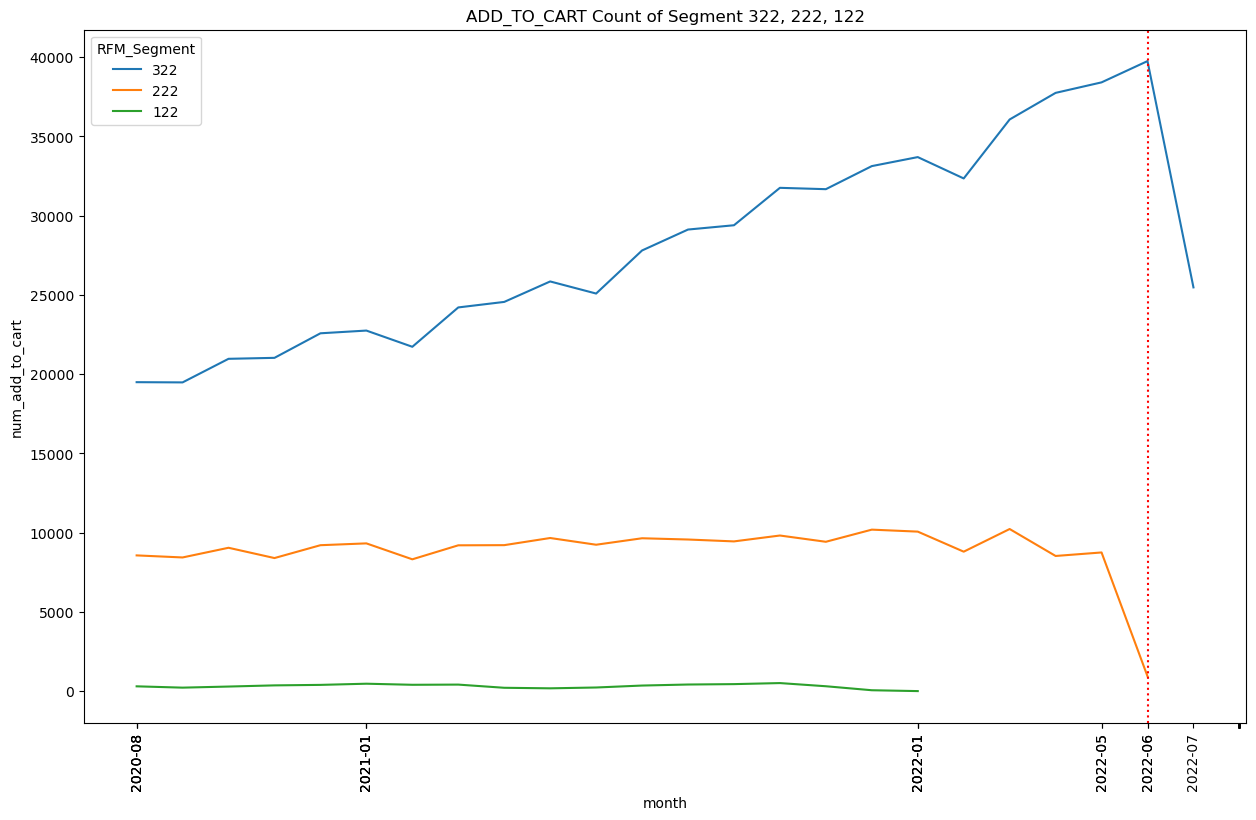

In [28]:
# 목표 세그먼트(322. 222. 122) 장바구니 담기 수
plt.figure(figsize=(15,9))
sns.lineplot(num_cart_rfm, x='month', y='num_add_to_cart', hue='RFM_Segment', hue_order=['322', '222', '122'])
label =['2020-08', '2021-01', '2022-01', '2022-05', '2022-06', '2022-07']
x_ticks = [month if month in label else '' for month in num_cart_rfm.month]
plt.xticks(x_ticks, rotation = 90)
plt.axvline('2022-06', color='red', linestyle='dotted')
plt.title('ADD_TO_CART Count of Segment 322, 222, 122')
plt.show()

### Segment별 방문주기

결론 <br>
122 36 days 21:03:32.145359428 <br>
222 10 days 17:58:26.765206542 <br>
322 2 days 09:21:25.858851154 <br>

최근성이 높은 Segment일수록 재방문주기가 짧다. 방문의 영향력이 높다?

In [29]:
df_target_segment.event_time = pd.to_datetime(df_target_segment.event_time)

/var/folders/72/sf0gd2_15c7bv2klzkjcqt580000gn/T/ipykernel_1613/3707906949.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_target_segment.event_time = pd.to_datetime(df_target_segment.event_time)


In [30]:
df_122 = df_target_segment[df_target_segment['RFM_Segment'] == 122]
df_222 = df_target_segment[df_target_segment['RFM_Segment'] == 222]
df_322 = df_target_segment[df_target_segment['RFM_Segment'] == 322]

In [31]:
df_122 = df_122.sort_values(by=['customer_id', 'event_time'])
df_122_head = df_122.groupby(['customer_id', 'session_id'])[['customer_id', 'session_id', 'event_time']].head(1)
df_122_head

,customer_id,session_id,event_time
3297453,41.00,ad12d8dd-bebe-4e8d-848b-c4728d7db581_1_0,2020-03-23 20:28:12.870908+00:00
68837,67.00,3179a7fb-d507-4e99-bc29-e322e2bcbb41_0,2017-11-13 14:55:29.283536+00:00
559072,67.00,7214bbe3-bd36-48b0-9016-a5bbf00adef8_0,2018-01-24 18:03:56.495255+00:00
559073,67.00,7214bbe3-bd36-48b0-9016-a5bbf00adef8_1,2018-02-22 18:39:39.495255+00:00
559075,67.00,7214bbe3-bd36-48b0-9016-a5bbf00adef8_2,2018-03-23 18:41:17.495255+00:00
...,...,...,...
1609123,99841.00,9881e1f5-2272-4994-bf66-59b495102078_7,2018-11-30 09:57:47.941003+00:00
5068719,99841.00,cad22c4a-96ba-4f49-856b-469506bdf026_3_0,2020-08-19 17:50:46.941003+00:00
5068720,99841.00,cad22c4a-96ba-4f49-856b-469506bdf026_3_1,2020-08-27 21:51:33.941003+00:00
5068722,99841.00,cad22c4a-96ba-4f49-856b-469506bdf026_3_2,2020-09-05 02:15:49.941003+00:00


In [32]:
df_122_tail = df_122.groupby(['customer_id', 'session_id'])[['customer_id', 'session_id', 'event_time']].tail(1)
df_122_tail

,customer_id,session_id,event_time
3297468,41.00,ad12d8dd-bebe-4e8d-848b-c4728d7db581_1_0,2020-03-23 20:55:00.371538+00:00
68842,67.00,3179a7fb-d507-4e99-bc29-e322e2bcbb41_0,2017-11-13 15:37:28.495255+00:00
559072,67.00,7214bbe3-bd36-48b0-9016-a5bbf00adef8_0,2018-01-24 18:03:56.495255+00:00
559074,67.00,7214bbe3-bd36-48b0-9016-a5bbf00adef8_1,2018-02-22 18:42:54.495255+00:00
559075,67.00,7214bbe3-bd36-48b0-9016-a5bbf00adef8_2,2018-03-23 18:41:17.495255+00:00
...,...,...,...
1609123,99841.00,9881e1f5-2272-4994-bf66-59b495102078_7,2018-11-30 09:57:47.941003+00:00
5068719,99841.00,cad22c4a-96ba-4f49-856b-469506bdf026_3_0,2020-08-19 17:50:46.941003+00:00
5068721,99841.00,cad22c4a-96ba-4f49-856b-469506bdf026_3_1,2020-08-27 22:18:16.941003+00:00
5068723,99841.00,cad22c4a-96ba-4f49-856b-469506bdf026_3_2,2020-09-05 02:19:56.941003+00:00


In [33]:
df_122_H_T = pd.concat([df_122_head, df_122_tail], axis = 0)
df_122_H_T = df_122_H_T.sort_values(['customer_id', 'event_time'])
df_122_H_T['revisit'] = df_122_H_T.groupby('customer_id')['event_time'].diff()
df_odd_rows = df_122_H_T.groupby('customer_id').apply(lambda x: x.iloc[::2]).reset_index(drop=True)
df_odd_rows.groupby('customer_id').revisit.mean()

customer_id
41.00                             NaT
67.00      23 days 10:31:03.825396825
90.00      29 days 13:53:50.280701754
169.00     33 days 22:36:04.961538461
230.00     35 days 10:01:53.058823529
                      ...            
99637.00    9 days 21:24:11.133802816
99698.00      24 days 19:05:09.750000
99705.00   18 days 06:49:38.755555555
99783.00   35 days 00:24:40.791666666
99841.00     111 days 12:51:22.250000
Name: revisit, Length: 1040, dtype: timedelta64[ns]

In [34]:
# 방문주기 계산 함수
def revisit(df):
    df = df.sort_values(by=['customer_id', 'event_time'])
    # customer_id별 한 session의 첫번째 이벤트
    df_head = df.groupby(['customer_id', 'session_id'])[['customer_id', 'session_id', 'event_time']].head(1)
    # customer_id별 한 session의 마지막 이벤트
    df_tail = df.groupby(['customer_id', 'session_id'])[['customer_id', 'session_id', 'event_time']].tail(1)

    # customer_id별 한 session의 첫번째, 마지막 이벤트 나열
    df_H_T = pd.concat([df_head, df_tail], axis = 0)
    df_H_T = df_H_T.sort_values(['customer_id', 'event_time'])
    
    # 이벤트 간 차이 구하기
    df_H_T['revisit'] = df_H_T.groupby('customer_id')['event_time'].diff()

    # 이전 session의 마지막 이벤트와 현재 session의 첫번째 이벤트 간 시간 차이(짝수번째 행들에 나열되어 있음)
    df_odd_rows = df_H_T.groupby('customer_id').apply(lambda x: x.iloc[::2]).reset_index(drop=True)
    
    return df_odd_rows.groupby('customer_id').revisit.mean().mean()

In [35]:
# Segment별 방문주기의 평균
print(revisit(df_122))
print(revisit(df_222))
print(revisit(df_322))

36 days 16:53:07.133714300
10 days 17:35:29.569879995
2 days 09:15:34.708449470


### Segment별 중고상품

#### Segment별 중고 검색어 비율

In [109]:
pd.merge(df_buy_split, customer_rfm[['customer_id', 'age_now']], on='customer_id', how='left')

,session_id,event_name,event_time,traffic_source,product_id,quantity,item_price,payment_status,search_keywords,promo_code,promo_amount,customer_id,booking_id,quarter,RFM_Segment,month,age_now
0,44122af0-0bf5-407b-b3ff-22c082c61426_0,HOMEPAGE,2016-10-09 21:17:34.380487+00:00,MOBILE,NaN,0,0,NaN,NaN,0.00,0.00,50.00,097c5406-68c5-4ecc-8399-8745cb3ff0ca,NaN,112.00,2016-10,22.00
1,44122af0-0bf5-407b-b3ff-22c082c61426_0,ADD_TO_CART,2016-10-09 21:28:40.380487+00:00,MOBILE,24639.00,1,255356,NaN,NaN,0.00,0.00,50.00,097c5406-68c5-4ecc-8399-8745cb3ff0ca,NaN,112.00,2016-10,22.00
2,44122af0-0bf5-407b-b3ff-22c082c61426_0,HOMEPAGE,2016-10-09 21:30:22.380487+00:00,MOBILE,NaN,0,0,NaN,NaN,0.00,0.00,50.00,097c5406-68c5-4ecc-8399-8745cb3ff0ca,NaN,112.00,2016-10,22.00
3,44122af0-0bf5-407b-b3ff-22c082c61426_0,HOMEPAGE,2016-10-09 21:42:14.380487+00:00,MOBILE,NaN,0,0,NaN,NaN,0.00,0.00,50.00,097c5406-68c5-4ecc-8399-8745cb3ff0ca,NaN,112.00,2016-10,22.00
4,44122af0-0bf5-407b-b3ff-22c082c61426_0,ITEM_DETAIL,2016-10-09 21:54:20.380487+00:00,MOBILE,NaN,0,0,NaN,NaN,0.00,0.00,50.00,097c5406-68c5-4ecc-8399-8745cb3ff0ca,NaN,112.00,2016-10,22.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12833597,fffe9f81-7737-47de-9468-8b7b7f93c25d_0,ADD_TO_CART,2018-05-24 17:35:57.717870+00:00,MOBILE,49510.00,1,246498,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-05,NaN
12833598,fffe9f81-7737-47de-9468-8b7b7f93c25d_0,PROMO_PAGE,2018-05-24 17:42:10.717870+00:00,MOBILE,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-05,NaN
12833599,fffe9f81-7737-47de-9468-8b7b7f93c25d_0,SEARCH,2018-05-24 17:48:10.717870+00:00,MOBILE,NaN,0,0,NaN,Dress,NaN,NaN,NaN,NaN,NaN,NaN,2018-05,NaN
12833600,fffe9f81-7737-47de-9468-8b7b7f93c25d_0,ITEM_DETAIL,2018-05-24 17:54:53.717870+00:00,MOBILE,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-05,NaN


In [105]:
df_target_segment

,session_id,event_name,event_time,traffic_source,product_id,quantity,item_price,payment_status,search_keywords,promo_code,promo_amount,customer_id,booking_id,quarter,RFM_Segment,month
6,e461cea6-1461-4816-a39b-01200fe21c6b_0,HOMEPAGE,2016-12-11 22:48:29.085678+00:00,MOBILE,NaN,0,0,NaN,NaN,0.00,0.00,98.00,b20ade25-44de-4ed6-b2f9-817c95a47695,NaN,222.00,2016-12
7,e461cea6-1461-4816-a39b-01200fe21c6b_0,ITEM_DETAIL,2016-12-11 22:51:52.085678+00:00,MOBILE,NaN,0,0,NaN,NaN,0.00,0.00,98.00,b20ade25-44de-4ed6-b2f9-817c95a47695,NaN,222.00,2016-12
8,e461cea6-1461-4816-a39b-01200fe21c6b_0,ADD_TO_CART,2016-12-11 22:52:07.085678+00:00,MOBILE,36516.00,1,214197,NaN,NaN,0.00,0.00,98.00,b20ade25-44de-4ed6-b2f9-817c95a47695,NaN,222.00,2016-12
9,e461cea6-1461-4816-a39b-01200fe21c6b_0,ITEM_DETAIL,2016-12-11 22:55:02.085678+00:00,MOBILE,NaN,0,0,NaN,NaN,0.00,0.00,98.00,b20ade25-44de-4ed6-b2f9-817c95a47695,NaN,222.00,2016-12
10,e461cea6-1461-4816-a39b-01200fe21c6b_0,ADD_TO_CART,2016-12-11 22:55:07.085678+00:00,MOBILE,47267.00,1,297068,NaN,NaN,0.00,0.00,98.00,b20ade25-44de-4ed6-b2f9-817c95a47695,NaN,222.00,2016-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12462999,be458630-6c39-4cf7-931d-010194e350d0_3_1,CLICK,2022-07-29 02:25:52.810263+00:00,MOBILE,NaN,0,0,NaN,NaN,0.00,0.00,99995.00,NaN,3.00,322.00,2022-07
12463000,be458630-6c39-4cf7-931d-010194e350d0_3_1,ITEM_DETAIL,2022-07-29 02:43:36.810263+00:00,MOBILE,NaN,0,0,NaN,NaN,0.00,0.00,99995.00,NaN,3.00,322.00,2022-07
12463001,be458630-6c39-4cf7-931d-010194e350d0_3_1,ITEM_DETAIL,2022-07-29 03:02:02.810263+00:00,MOBILE,NaN,0,0,NaN,NaN,0.00,0.00,99995.00,NaN,3.00,322.00,2022-07
12463002,be458630-6c39-4cf7-931d-010194e350d0_3_1,CLICK,2022-07-29 03:19:56.810263+00:00,MOBILE,NaN,0,0,NaN,NaN,0.00,0.00,99995.00,NaN,3.00,322.00,2022-07


결론 <br>
Segment별로 전체 검색어 중 중고상품에 대한 검색어 비율이 20%로 차이가 없음(검색어 중 2등)

In [36]:
# Segment별 전체 검색어 중 중고상품에 대한 검색어 비율
df_target_segment.groupby('RFM_Segment').search_keywords.value_counts(normalize=True)

RFM_Segment  search_keywords
122.00       Dress             0.29
             Second Hand       0.20
             Shirts            0.14
             Woman's Bag       0.11
             T-Shirt           0.08
             Nike Shoes        0.04
             Work Bag          0.04
             Trousers          0.03
             Adidas Shoes      0.03
             Shoes             0.02
             Sandal            0.01
             Watch             0.00
             Hat               0.00
             House dress       0.00
             Pajamas           0.00
222.00       Dress             0.29
             Second Hand       0.19
             Shirts            0.14
             Woman's Bag       0.11
             T-Shirt           0.08
             Nike Shoes        0.05
             Work Bag          0.03
             Trousers          0.03
             Shoes             0.02
             Adidas Shoes      0.02
             Sandal            0.01
             Watch             0.00

#### segment별 구매자 중 중고 검색 고객이 어떤 상품이던 검색후 Add_to_Cart로 이어졌는지 확인(Old session 기준)

결론 <br>
122 : 62% <br>
222 : 60% <br>
322 : 16% <br>
Old Session 기준으로 중고 검색을 했을때 최근에 가까운 그룹일 수록 중고 검색 후 ADD_TO_CART, BOOKING으로 이어진 비율이 적어지는 중 <br>
중고상품에 대해서 검색 엔진이 소비자들에게 만족할만한 검색 결과를 제공하지 못할 수도 있을듯

In [37]:
second_hand_session = df_buy_split_old[df_buy_split_old['search_keywords'] == 'Second Hand'].groupby('RFM_Segment')['old_session'].unique()
second_hand_session

RFM_Segment
122.00    [9d8633fc-e01d-482b-8b05-98835681cf03, 6fc8515...
222.00    [8c0f9d3b-bc65-477d-a051-b90d8ced49ac, 5c897c6...
322.00    [0c89963c-e1c1-4090-9779-95f03ed42116, c71c67e...
Name: old_session, dtype: object

In [38]:
df_buy_split_old.event_time = pd.to_datetime(df_buy_split_old.event_time)

In [39]:
df_buy_split_old[df_buy_split_old.event_name == 'BOOKING'].old_session.nunique()

767867

In [40]:
# 한 세션에서 중고를 검색한 이후에 ADD_TO_CART 행동을 한 세션 수(약 8분 소요)
for i in range(0, 3):
    cart_cnt = 0

    # RFM_Segment별로 중고 검색이 있는 세션 분류
    # 122 -> 222 -> 322 순서로 for문 돌기
    filtered_sessions = df_buy_split_old[df_buy_split_old.old_session.isin(second_hand_session.iloc[i])]

    # 중고 검색이 있는 세션 하나하나 확인
    for session in filtered_sessions.old_session.unique():
        # 중고 검색이 있는 세션
        search_add_to_cart = filtered_sessions[filtered_sessions.old_session == session]
        # 중고 검색을 한 이후 세션만 필터링
        search_add_to_cart = search_add_to_cart[search_add_to_cart.event_time >= search_add_to_cart[search_add_to_cart['search_keywords'] == 'Second Hand'].event_time.iloc[0]]
        # 중고 검색을 한 이후 세션에 ADD_TO_CART가 있으면 카운트(세션 분할 전 구매내역이 있는 데이터만 사용했기 때문에 장바구니 담기 후 구매까지 이어졌다고 판단하면 됨)
        event_names = search_add_to_cart.event_name.unique()
        if 'ADD_TO_CART' in event_names:
            cart_cnt += 1
        
    print(cart_cnt)


58
1786
3382


In [41]:
# Segment별 중고 검색 세션 수 대비 중고 검색 후 ADD_TO_CART까지 한 비율(Old session 기준)
pd.Series(np.array([58, 1786, 3382]), index=[122, 222, 322]) / second_hand_session.str.len()

122   0.62
222   0.60
322   0.16
dtype: float64

### Segment별 구매전환율

#### Segment별 Micro, Macro 전환율

In [42]:
session_info = df_target_segment.groupby(['month', 'RFM_Segment'])[['session_id']].nunique()
session_info.reset_index(inplace=True)
session_info

,month,RFM_Segment,session_id
0,2016-07,122.00,23
1,2016-07,222.00,128
2,2016-07,322.00,425
3,2016-08,122.00,30
4,2016-08,222.00,404
...,...,...,...
208,2022-05,322.00,277638
209,2022-06,222.00,4085
210,2022-06,322.00,279688
211,2022-07,322.00,198620


In [43]:
# 장바구니 세션 수(Micro CVR)
session_info = pd.merge(session_info, df_target_segment[df_target_segment.event_name == 'ADD_TO_CART'].groupby(['month', 'RFM_Segment']).session_id.nunique(), how='left', on=['month', 'RFM_Segment'])

# 구매 세션 수(Macro CVR)
session_info = pd.merge(session_info, df_target_segment[df_target_segment.event_name == 'BOOKING'].groupby(['month', 'RFM_Segment']).booking_id.nunique(), how='left', on=['month', 'RFM_Segment'])

In [44]:
session_info.rename(columns={'session_id_x':'num_session', 'session_id_y':'num_cart', 'booking_id':'num_booking'},inplace=True)
session_info

,month,RFM_Segment,num_session,num_cart,num_booking
0,2016-07,122.00,23,23.00,22.00
1,2016-07,222.00,128,92.00,81.00
2,2016-07,322.00,425,74.00,56.00
3,2016-08,122.00,30,28.00,27.00
4,2016-08,222.00,404,192.00,151.00
...,...,...,...,...,...
208,2022-05,322.00,277638,38408.00,22973.00
209,2022-06,222.00,4085,936.00,1055.00
210,2022-06,322.00,279688,39750.00,24174.00
211,2022-07,322.00,198620,25473.00,21289.00


In [45]:
session_info['micro_cvr'] = session_info.num_cart / session_info.num_session
session_info['macro_cvr'] = session_info.num_booking / session_info.num_session

In [46]:
session_info['micro_cvr_diff'] = session_info.groupby('RFM_Segment').micro_cvr.pct_change()
session_info['macro_cvr_diff'] = session_info.groupby('RFM_Segment').macro_cvr.pct_change()
session_info

,month,RFM_Segment,num_session,num_cart,num_booking,micro_cvr,macro_cvr,micro_cvr_diff,macro_cvr_diff
0,2016-07,122.00,23,23.00,22.00,1.00,0.96,NaN,NaN
1,2016-07,222.00,128,92.00,81.00,0.72,0.63,NaN,NaN
2,2016-07,322.00,425,74.00,56.00,0.17,0.13,NaN,NaN
3,2016-08,122.00,30,28.00,27.00,0.93,0.90,-0.07,-0.06
4,2016-08,222.00,404,192.00,151.00,0.48,0.37,-0.34,-0.41
...,...,...,...,...,...,...,...,...,...
208,2022-05,322.00,277638,38408.00,22973.00,0.14,0.08,-0.02,-0.00
209,2022-06,222.00,4085,936.00,1055.00,0.23,0.26,-0.16,1.21
210,2022-06,322.00,279688,39750.00,24174.00,0.14,0.09,0.03,0.04
211,2022-07,322.00,198620,25473.00,21289.00,0.13,0.11,-0.10,0.24


In [47]:
session_info = session_info[(session_info.month >= '2020-08') & (session_info.month <= '2022-07')]

In [48]:
session_info.RFM_Segment = session_info.RFM_Segment.astype('int').astype('str')

/var/folders/72/sf0gd2_15c7bv2klzkjcqt580000gn/T/ipykernel_1613/2492974251.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  session_info.RFM_Segment = session_info.RFM_Segment.astype('int').astype('str')


/var/folders/72/sf0gd2_15c7bv2klzkjcqt580000gn/T/ipykernel_1613/2826490406.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  session_info.month = session_info.month.astype('str')


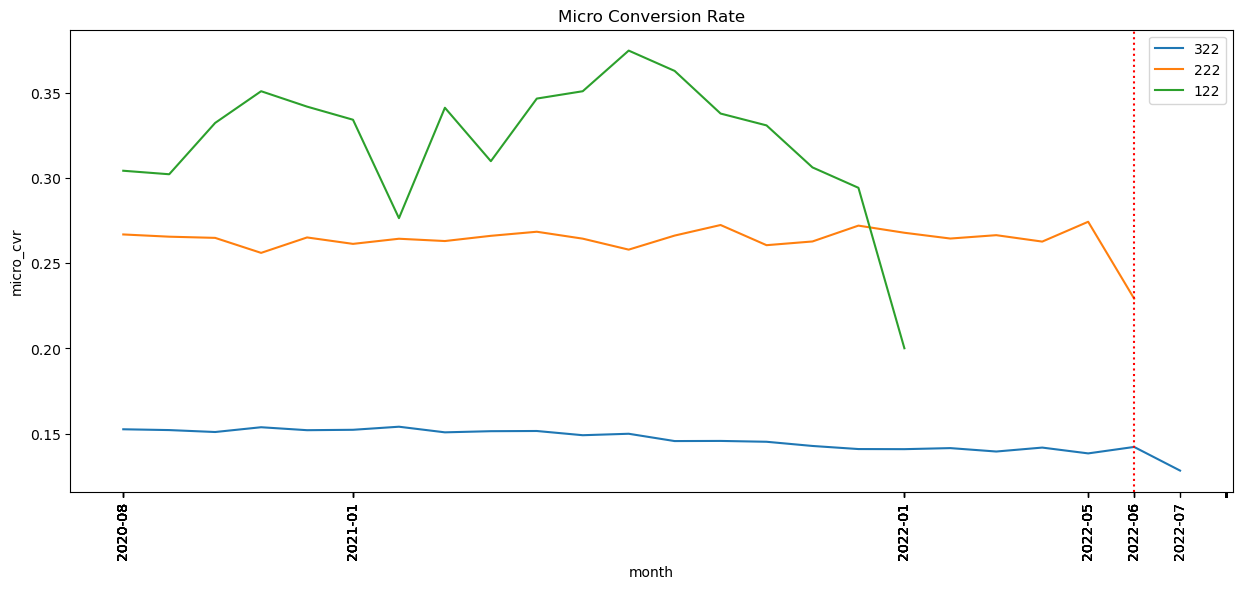

In [49]:
# Micro Conversion(장바구니까지 전환율)
session_info.month = session_info.month.astype('str')

plt.figure(figsize=(15,6))
sns.lineplot(data = session_info, x = 'month', y='micro_cvr', hue='RFM_Segment', hue_order=['322', '222', '122'])
label =['2020-08', '2021-01', '2022-01', '2022-05', '2022-06', '2022-07']
x_ticks = [month if month in label else '' for month in num_booking_id_rfm.month]
plt.xticks(x_ticks, rotation = 90)
plt.axvline('2022-06', color='red', linestyle='dotted')
plt.title('Micro Conversion Rate')
plt.legend()
plt.show()

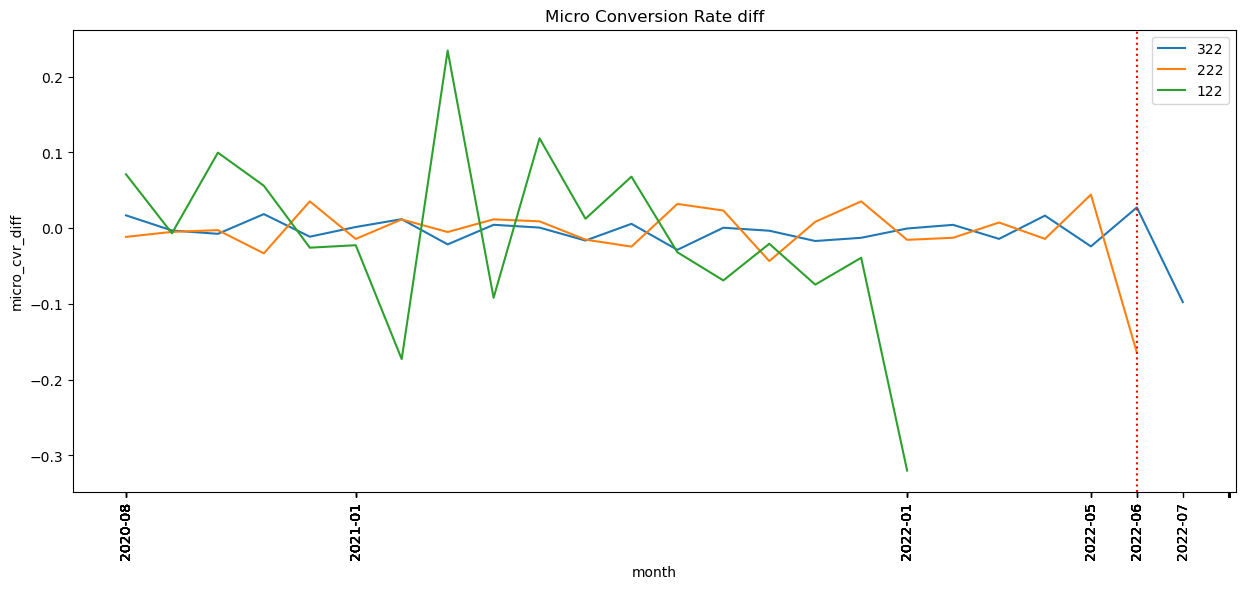

In [50]:
# Micro Conversion의 변화(장바구니까지 전환율의 백분율 변화)
plt.figure(figsize=(15,6))
sns.lineplot(data = session_info, x = 'month', y='micro_cvr_diff', hue='RFM_Segment', hue_order=['322', '222', '122'])
label =['2020-08', '2021-01', '2022-01', '2022-05', '2022-06', '2022-07']
x_ticks = [month if month in label else '' for month in num_booking_id_rfm.month]
plt.xticks(x_ticks, rotation = 90)
plt.axvline('2022-06', color='red', linestyle='dotted')
plt.title('Micro Conversion Rate diff')
plt.legend()
plt.show()

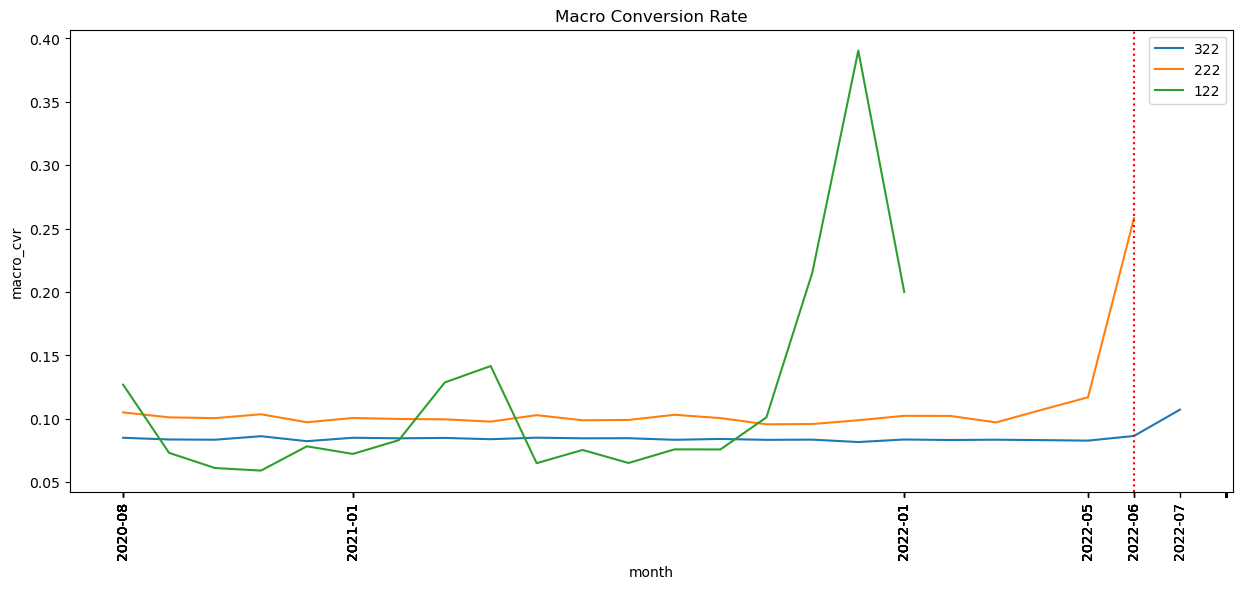

In [51]:
# Macro Conversion(구매까지 전환율)
plt.figure(figsize=(15,6))
sns.lineplot(data = session_info, x = 'month', y='macro_cvr', hue='RFM_Segment', hue_order=['322', '222', '122'])
label =['2020-08', '2021-01', '2022-01', '2022-05', '2022-06', '2022-07']
x_ticks = [month if month in label else '' for month in num_booking_id_rfm.month]
plt.xticks(x_ticks, rotation = 90)
plt.axvline('2022-06', color='red', linestyle='dotted')
plt.title('Macro Conversion Rate')
plt.legend()
plt.show()

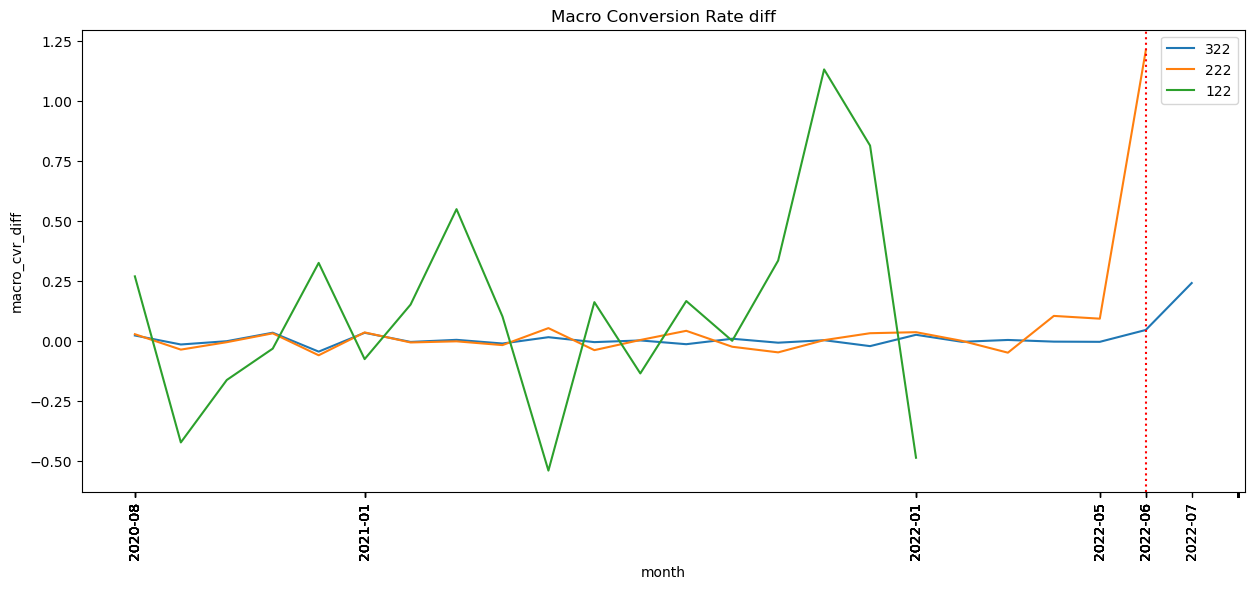

In [52]:
# Macro Conversion의 변화(구매까지 전환율의 백분율 변화)
plt.figure(figsize=(15,6))
sns.lineplot(data = session_info, x = 'month', y='macro_cvr_diff', hue='RFM_Segment', hue_order=['322', '222', '122'])
label =['2020-08', '2021-01', '2022-01', '2022-05', '2022-06', '2022-07']
x_ticks = [month if month in label else '' for month in num_booking_id_rfm.month]
plt.xticks(x_ticks, rotation = 90)
plt.axvline('2022-06', color='red', linestyle='dotted')
plt.title('Macro Conversion Rate diff')
plt.legend()
plt.show()

#### Segment별 장바구니에서 구매까지의 전환율

In [53]:
# Segment별 상품을 장바구니에 담고 구매까지 한 사람들의 수(분자)
booking_session_id = df_target_segment[df_target_segment['event_name'] == 'BOOKING'].session_id.unique()
cart_buy_id = df_target_segment[(df_target_segment['event_name'] == 'ADD_TO_CART') & df_target_segment['session_id'].isin(booking_session_id)].session_id.unique()
num_cart_buy = df_target_segment[df_target_segment['session_id'].isin(cart_buy_id)].groupby(['month', 'RFM_Segment']).session_id.nunique()
num_cart_buy


month    RFM_Segment
2016-07  122.00           22
         222.00           74
         322.00           44
2016-08  122.00           25
         222.00          120
                        ... 
2022-05  222.00           50
         322.00         1238
2022-06  222.00           11
         322.00         1504
2022-07  322.00         3810
Name: session_id, Length: 210, dtype: int64

In [54]:
# Segment별 상품을 장바구니에 담은 수(분모)
num_cart = df_target_segment[df_target_segment['event_name'] == 'ADD_TO_CART'].groupby(['month', 'RFM_Segment']).session_id.nunique()
num_cart

month    RFM_Segment
2016-07  122.00            23
         222.00            92
         322.00            74
2016-08  122.00            28
         222.00           192
                        ...  
2022-05  222.00          8748
         322.00         38408
2022-06  222.00           936
         322.00         39750
2022-07  322.00         25473
Name: session_id, Length: 212, dtype: int64

In [55]:
# Segment별 장바구니에서 구매까지의 전환율
cart_buy_CVR = num_cart_buy/num_cart
cart_buy_CVR = pd.DataFrame(cart_buy_CVR)
cart_buy_CVR.reset_index(inplace=True)
cart_buy_CVR

,month,RFM_Segment,session_id
0,2016-07,122.00,0.96
1,2016-07,222.00,0.80
2,2016-07,322.00,0.59
3,2016-08,122.00,0.89
4,2016-08,222.00,0.62
...,...,...,...
207,2022-05,222.00,0.01
208,2022-05,322.00,0.03
209,2022-06,222.00,0.01
210,2022-06,322.00,0.04


In [56]:
cart_buy_CVR = cart_buy_CVR[(cart_buy_CVR.month >= '2020-08') & (cart_buy_CVR.month <= '2022-07')]
cart_buy_CVR.month = cart_buy_CVR.month.astype('str')
cart_buy_CVR.RFM_Segment = cart_buy_CVR.RFM_Segment.astype('int').astype('str')
cart_buy_CVR.rename(columns={'session_id' : 'cart_buy_CVR'}, inplace=True)

/var/folders/72/sf0gd2_15c7bv2klzkjcqt580000gn/T/ipykernel_1613/2287482668.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cart_buy_CVR.month = cart_buy_CVR.month.astype('str')
/var/folders/72/sf0gd2_15c7bv2klzkjcqt580000gn/T/ipykernel_1613/2287482668.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cart_buy_CVR.RFM_Segment = cart_buy_CVR.RFM_Segment.astype('int').astype('str')
/var/folders/72/sf0gd2_15c7bv2klzkjcqt580000gn/T/ipykernel_1613/2287482668.py:4: SettingWithCopyWarning: 
A value is trying 

In [57]:
cart_buy_CVR['cart_buy_CVR_diff'] = cart_buy_CVR.groupby('RFM_Segment').cart_buy_CVR.pct_change()
cart_buy_CVR

/var/folders/72/sf0gd2_15c7bv2klzkjcqt580000gn/T/ipykernel_1613/1818879540.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cart_buy_CVR['cart_buy_CVR_diff'] = cart_buy_CVR.groupby('RFM_Segment').cart_buy_CVR.pct_change()


,month,RFM_Segment,cart_buy_CVR,cart_buy_CVR_diff
147,2020-08,122,0.04,NaN
148,2020-08,222,0.02,NaN
149,2020-08,322,0.04,NaN
150,2020-09,122,0.01,-0.77
151,2020-09,222,0.02,-0.02
...,...,...,...,...
207,2022-05,222,0.01,-0.26
208,2022-05,322,0.03,-0.04
209,2022-06,222,0.01,1.06
210,2022-06,322,0.04,0.17


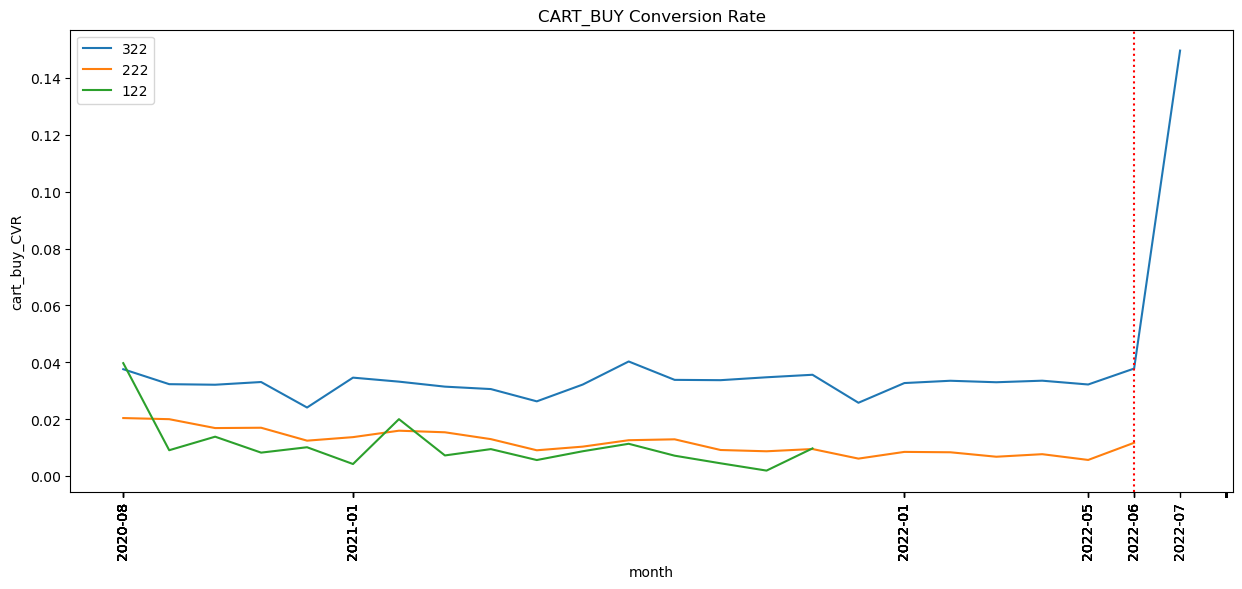

In [58]:
# Segment별 장바구니에서 구매까지의 전환율 그래프
plt.figure(figsize=(15,6))
sns.lineplot(data = cart_buy_CVR, x = 'month', y='cart_buy_CVR', hue='RFM_Segment', hue_order=['322', '222', '122'])
label =['2020-08', '2021-01', '2022-01', '2022-05', '2022-06', '2022-07']
x_ticks = [month if month in label else '' for month in num_booking_id_rfm.month]
plt.xticks(x_ticks, rotation = 90)
plt.axvline('2022-06', color='red', linestyle='dotted')
plt.title('CART_BUY Conversion Rate')
plt.legend()
plt.show()

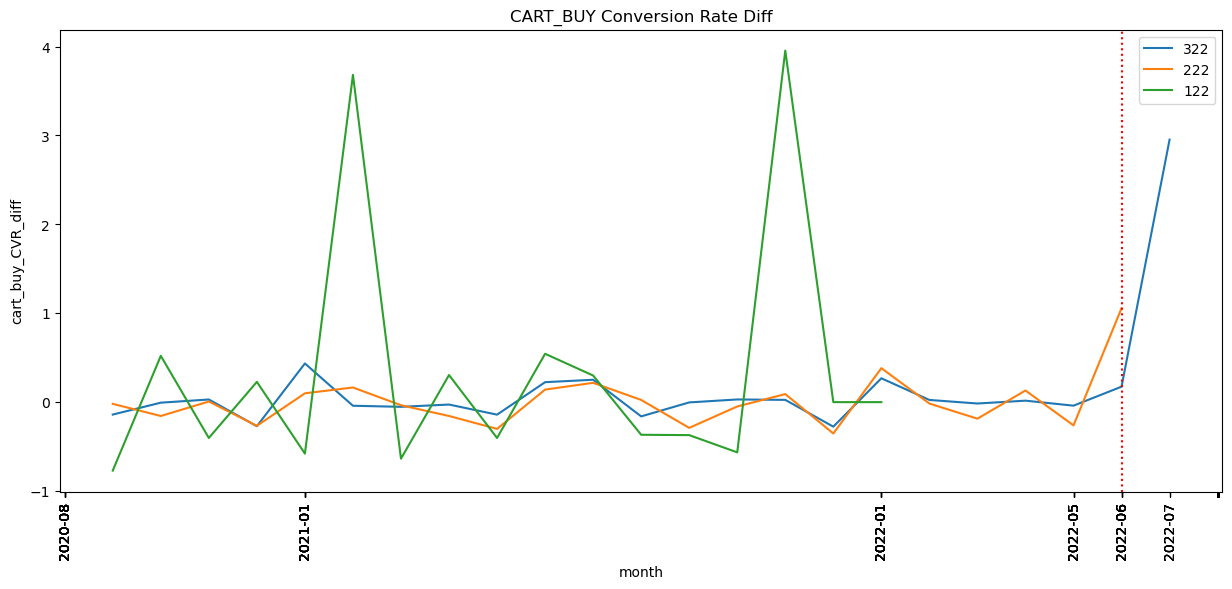

In [59]:
# Segment별 장바구니에서 구매까지의 전환율 변화 그래프
plt.figure(figsize=(15,6))
sns.lineplot(data = cart_buy_CVR, x = 'month', y='cart_buy_CVR_diff', hue='RFM_Segment', hue_order=['322', '222', '122'])
label =['2020-08', '2021-01', '2022-01', '2022-05', '2022-06', '2022-07']
x_ticks = [month if month in label else '' for month in num_booking_id_rfm.month]
plt.xticks(x_ticks, rotation = 90)
plt.axvline('2022-06', color='red', linestyle='dotted')
plt.title('CART_BUY Conversion Rate Diff')
plt.legend()
plt.show()

In [ ]:
# 방문이 매출에 영향을 미친다 -> 세그먼트별 매출/세션
# 

In [143]:
customer_rfm

,customer_id,gender,birthdate,home_location,first_join_date,age_join,age_now,age_segment,join_year,join_month,RFM_Segment
0,2870,F,1996-06-14,Sumatera Barat,2019-07-21,23,26,Late 20s(26-30),2019,7,NaN
1,8193,F,1993-08-16,Jakarta Raya,2017-07-16,24,29,Late 20s(26-30),2017,7,NaN
2,7279,M,1989-01-23,Nusa Tenggara Barat,2020-08-23,31,33,Early 30s(31-35),2020,8,322.00
3,88813,M,1991-01-05,Kalimantan Timur,2021-10-03,30,31,Early 30s(31-35),2021,10,NaN
4,82542,M,2000-07-15,Kalimantan Selatan,2021-04-11,21,22,Early 20s(21-25),2021,4,111.00
...,...,...,...,...,...,...,...,...,...,...,...
99994,34743,M,2000-11-17,Lampung,2020-10-17,20,22,Early 20s(21-25),2020,10,322.00
99995,72065,M,1998-03-30,Aceh,2017-11-25,19,24,Early 20s(21-25),2017,11,322.00
99996,32818,F,1993-01-12,Maluku,2018-09-01,25,29,Late 20s(26-30),2018,9,322.00
99997,75597,M,2000-09-13,Jambi,2020-05-31,20,22,Early 20s(21-25),2020,5,NaN


In [142]:
customer_rfm[customer_rfm.RFM_Segment == 322].join_year.value_counts()

2021    3583
2020    2817
2019    2028
2018    1777
2022    1631
2017    1419
2016     491
Name: join_year, dtype: int64

In [146]:
customer_rfm['first_join_date'] = pd.to_datetime(customer_rfm['first_join_date']).dt.to_period('M')
customer_rfm


,customer_id,gender,birthdate,home_location,first_join_date,age_join,age_now,age_segment,join_year,join_month,RFM_Segment,join_y_m
0,2870,F,1996-06-14,Sumatera Barat,2019-07,23,26,Late 20s(26-30),2019,7,NaN,2026
1,8193,F,1993-08-16,Jakarta Raya,2017-07,24,29,Late 20s(26-30),2017,7,NaN,2024
2,7279,M,1989-01-23,Nusa Tenggara Barat,2020-08,31,33,Early 30s(31-35),2020,8,322.00,2028
3,88813,M,1991-01-05,Kalimantan Timur,2021-10,30,31,Early 30s(31-35),2021,10,NaN,2031
4,82542,M,2000-07-15,Kalimantan Selatan,2021-04,21,22,Early 20s(21-25),2021,4,111.00,2025
...,...,...,...,...,...,...,...,...,...,...,...,...
99994,34743,M,2000-11-17,Lampung,2020-10,20,22,Early 20s(21-25),2020,10,322.00,2030
99995,72065,M,1998-03-30,Aceh,2017-11,19,24,Early 20s(21-25),2017,11,322.00,2028
99996,32818,F,1993-01-12,Maluku,2018-09,25,29,Late 20s(26-30),2018,9,322.00,2027
99997,75597,M,2000-09-13,Jambi,2020-05,20,22,Early 20s(21-25),2020,5,NaN,2025


TypeError: Invalid object type at position 0

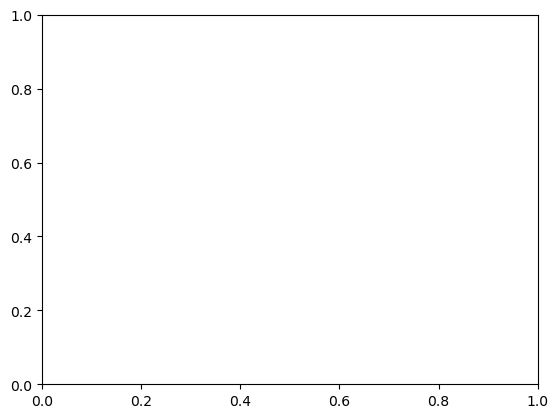

In [158]:
temp = pd.DataFrame(customer_rfm[customer_rfm.RFM_Segment == 322].first_join_date.value_counts()).reset_index()
temp = temp.sort_values(by='index')
sns.lineplot(temp, x = 'index')